In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import rv_discrete

from src.code.simulation.galton_watson import GaltonWatson
from src.code.simulation.probability_distributions import create_distributions
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.config.config import seed
from src.utils.utils import init_notebook

In [3]:
init_notebook(seed)

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [4]:
poisson_1 = stats.poisson(1)

In [5]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [6]:
nb_survivants = gp1.simule(20)

In [7]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 10 époques.


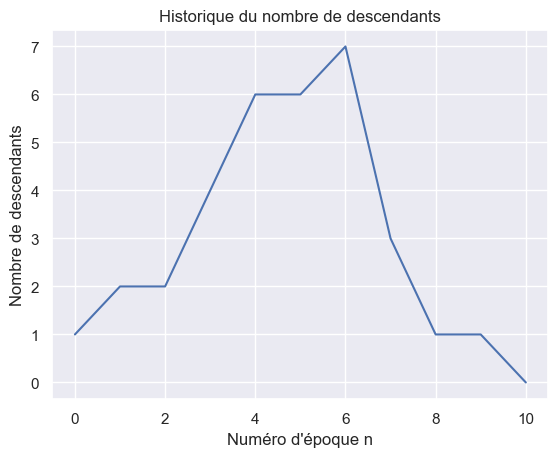

In [8]:
gp1.plot_historique_descendants()

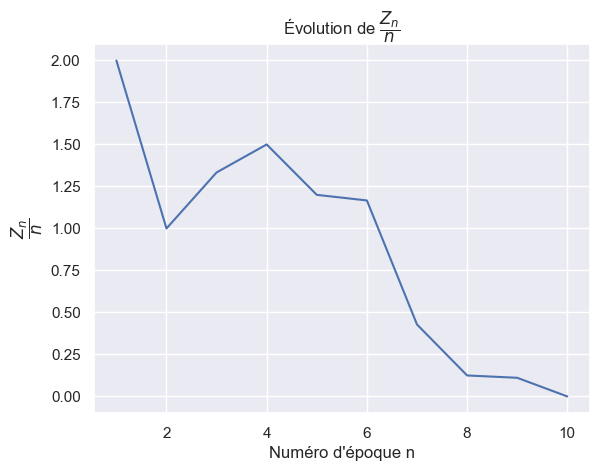

In [9]:
# noinspection JupyterPackage
gp1.plot_zn_sur_n()

#### Arbre de Galton-Watson

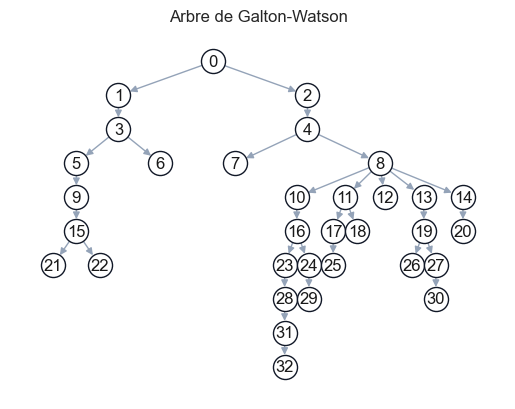

In [10]:
gp1.plot_arbre()

### λ = 2

In [11]:
poisson_2 = stats.poisson(2)

In [12]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [13]:
nb_survivants = gp2.simule(20)

In [14]:
print(f"Il reste {nb_survivants} survivants au bout de {gp2.n} époques.")

Il reste 680149 survivants au bout de 20 époques.


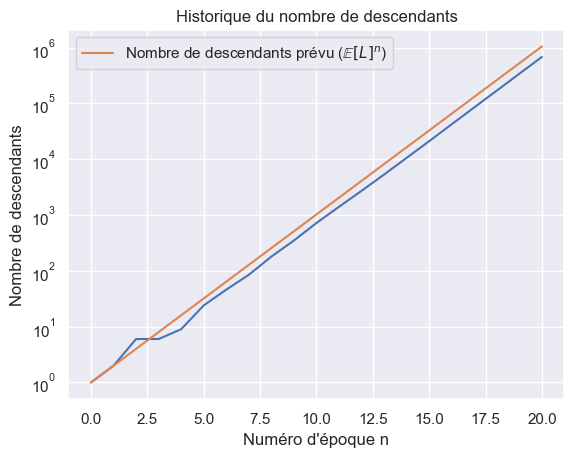

In [15]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

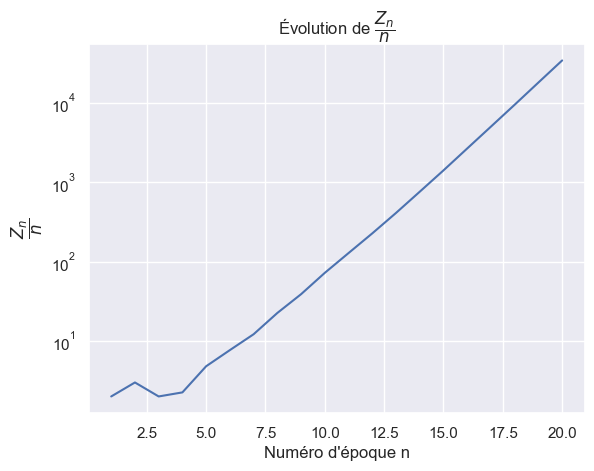

In [16]:
gp2.plot_zn_sur_n(logscale=True)

## Essais $Z_n / n$

In [17]:
nb_simulations = 10_000
nb_epoques = 100

In [18]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

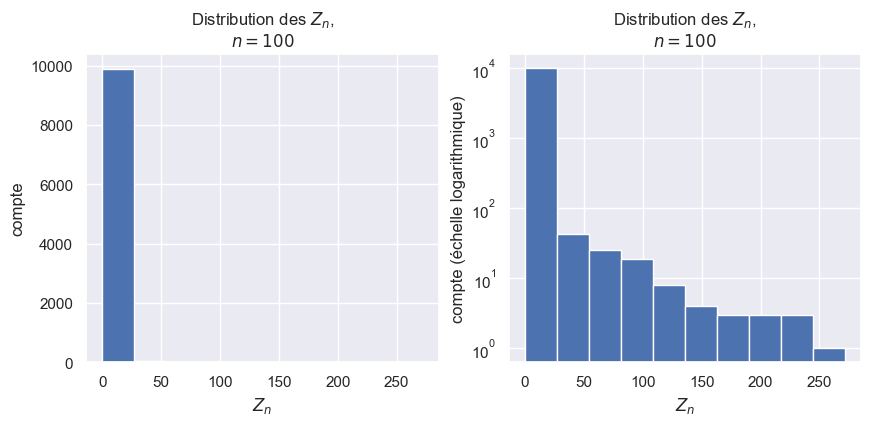

In [19]:
plot_zn_distribution(simulations, nb_epoques)

In [20]:
np.sum(simulations > 0)

191

In [21]:
zn_sup_zero = simulations[simulations > 0]

(array([83., 43., 26., 17.,  8.,  4.,  3.,  3.,  3.,  1.]),
 array([  1. ,  28.1,  55.2,  82.3, 109.4, 136.5, 163.6, 190.7, 217.8,
        244.9, 272. ]),
 <BarContainer object of 10 artists>)

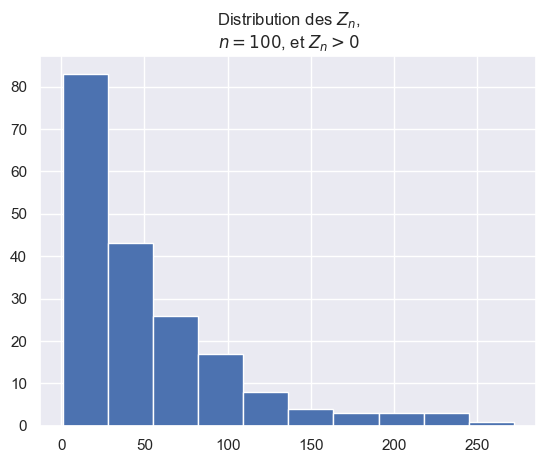

In [22]:
plt.title("Distribution des $Z_n$,\n$n = 100$, et $Z_n > 0$")
plt.hist(zn_sup_zero)

In [23]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.902959051509415


In [24]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [25]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

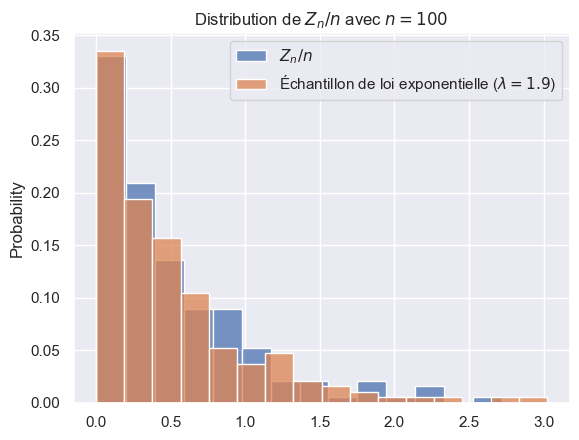

In [26]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [27]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.057586680541798524
p_value = 0.531818713902256
Les données suivent une loi exponentielle.


0.531818713902256

## Loi uniforme sur {0, 1, 2}

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Uniforme}}(0, 2)$.

In [28]:
uniforme2 = stats.randint(0, 3)

In [29]:
gu2 = GaltonWatson(uniforme2)
gu2

Processus Galton-Watson
- loi de reproduction L : randint
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [30]:
nb_survivants = gu2.simule(100)

In [31]:
print(f"Il reste {nb_survivants} survivants au bout de {gu2.n} époques.")

Il reste 23 survivants au bout de 100 époques.


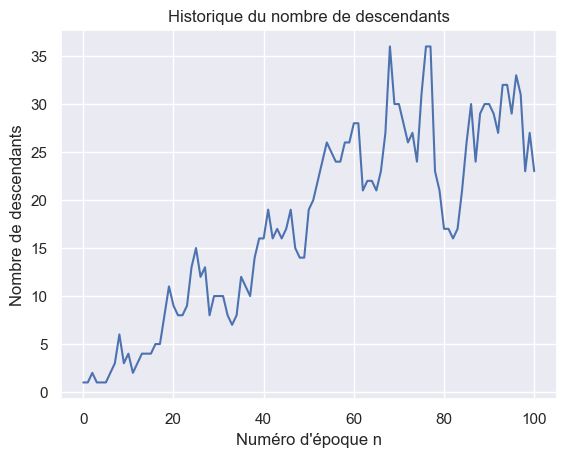

In [32]:
gu2.plot_historique_descendants()

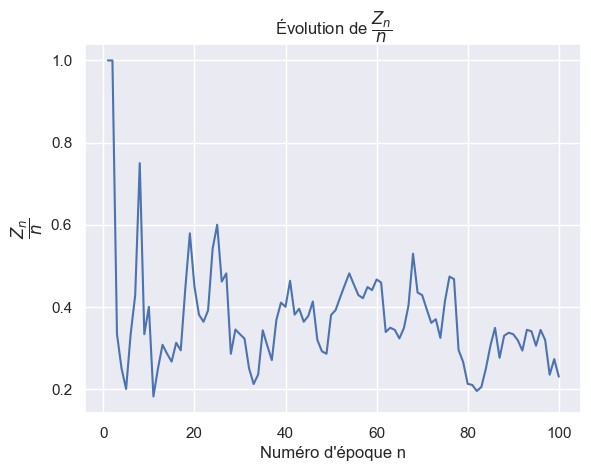

In [33]:
gu2.plot_zn_sur_n()

#### Arbre de Galton-Watson

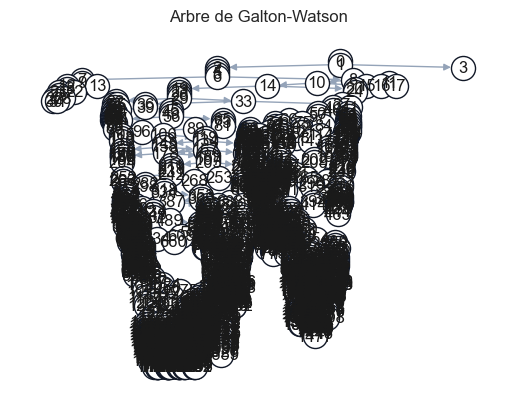

In [34]:
gu2.plot_arbre()

## Essais $Z_n / n$

In [35]:
nb_simulations = 10_000
nb_epoques = 100

simulations = gu2.lance_simulations(nb_simulations, nb_epoques)

In [36]:
simulations = np.array(simulations)

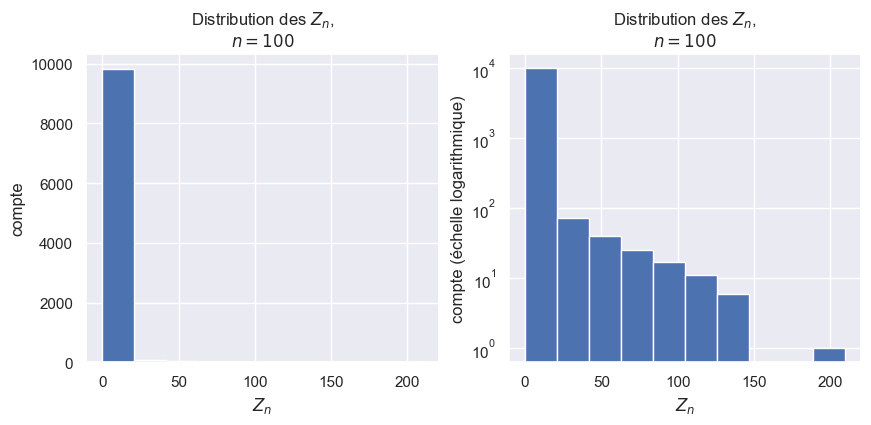

In [37]:
plot_zn_distribution(simulations, nb_epoques)

In [38]:
np.sum(simulations > 0)

295

In [39]:
zn_sup_zero = simulations[simulations > 0]

(array([125.,  73.,  39.,  25.,  17.,   9.,   6.,   0.,   0.,   1.]),
 array([  1. ,  21.9,  42.8,  63.7,  84.6, 105.5, 126.4, 147.3, 168.2,
        189.1, 210. ]),
 <BarContainer object of 10 artists>)

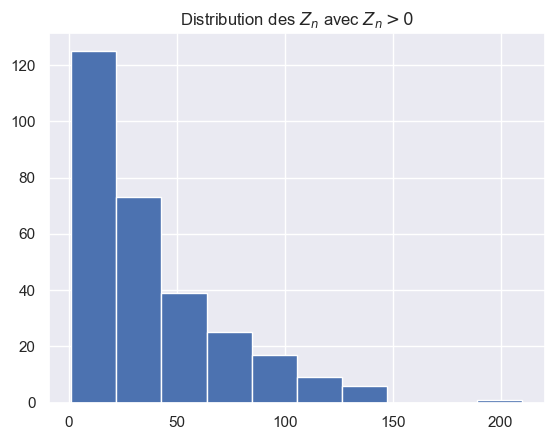

In [40]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [41]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.6538323137819364


In [42]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [43]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

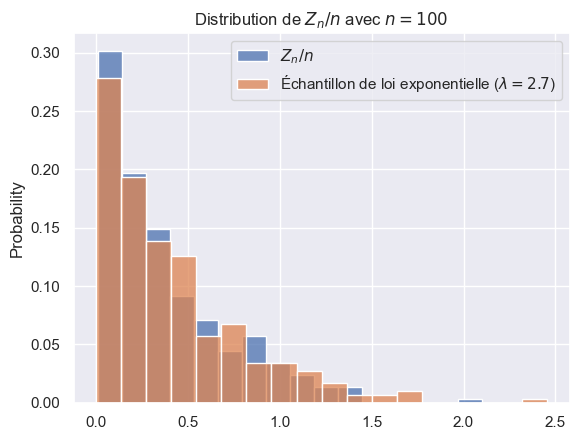

In [44]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability", label="$Z_n / n$")
sns.histplot(
    echantillon_expo,
    stat="probability",
    label=f"Échantillon de loi exponentielle ($\\lambda = {lambda_estime: 0.2}$)",
)

plt.legend()

In [45]:
p_value, _ = test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.033088011086562646
p_value = 0.8924378062988716
Les données suivent une loi exponentielle.


## Expérimentations

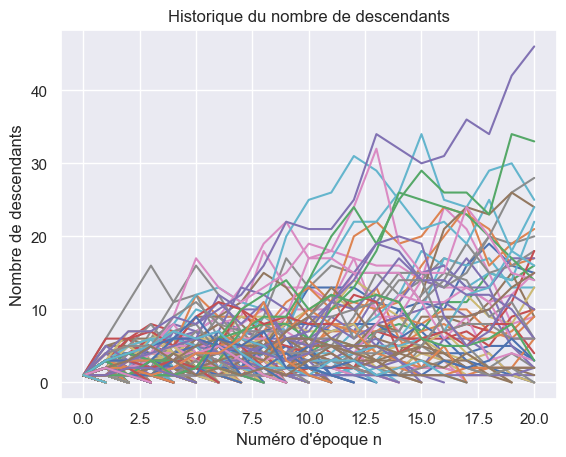

In [46]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_historique_descendants()

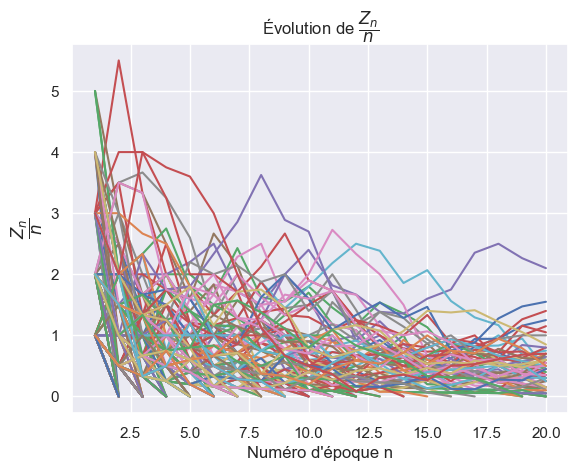

In [47]:
for _ in range(500):
    gp1.reset()
    gp1.simule(20)
    gp1.plot_zn_sur_n()

### Mise au propre Yaglom

In [48]:
nb_simulations = 1_000
nb_epoques = 300

In [49]:
simulations = gp1.lance_simulations(nb_simulations, nb_epoques)
simulations = np.array(simulations)

In [50]:
np.sum(simulations > 0)

10

In [51]:
zn_sup_zero = simulations[simulations > 0]

In [52]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 2.237136465324385


In [53]:
test_loi_exponentielle(zn_sup_zero / nb_epoques)

statistique_ks = 0.17992693516253766
p_value = 0.8476134088431372
Les données suivent une loi exponentielle.


0.8476134088431372

In [54]:
def processus_critique_survivant(
    gp: GaltonWatson, nb_simulations: int = 1_000, nb_epoques: int = 100
) -> np.ndarray:
    simulations = gp.lance_simulations(nb_simulations, nb_epoques)
    simulations = np.array(simulations)

    zn_sup_zero = simulations[simulations > 0]

    return zn_sup_zero

In [55]:
liste = []

for i in range(10):
    nb_epoques = (i + 1) * 100
    res = processus_critique_survivant(
        gp1, nb_simulations=(i + 1) * 1_000, nb_epoques=nb_epoques
    )
    liste.append(res)

    lambda_estime = 1.0 / np.mean(liste[i] / nb_epoques)
    print(f"{lambda_estime = }")
    test_loi_exponentielle(liste[i] / nb_epoques)
    print()

lambda_estime = 2.496714848883049
statistique_ks = 0.1353386825761277
p_value = 0.8323053074767905
Les données suivent une loi exponentielle.

lambda_estime = 2.2566995768688294
statistique_ks = 0.15765363765402207
p_value = 0.7655656885151587
Les données suivent une loi exponentielle.

lambda_estime = 2.109375
statistique_ks = 0.15885560086666806
p_value = 0.6963535625653527
Les données suivent une loi exponentielle.

lambda_estime = 1.6647244880972198
statistique_ks = 0.15637416334488852
p_value = 0.5234163423589144
Les données suivent une loi exponentielle.

lambda_estime = 2.457002457002457
statistique_ks = 0.17924349600313272
p_value = 0.7738470021279904
Les données suivent une loi exponentielle.

lambda_estime = 2.375
statistique_ks = 0.1302030836807745
p_value = 0.8637542274321706
Les données suivent une loi exponentielle.

lambda_estime = 1.9525801952580195
statistique_ks = 0.10178421586727449
p_value = 0.9056226493911196
Les données suivent une loi exponentielle.

lambda_estim

In [180]:
class SimulateurGaltonWatson:
    def __init__(
        self, loi: rv_discrete, nb_descendants: int = 1, nb_processus: int = 1_000
    ):
        self.nb_processus = nb_processus
        self.simulations: list[GaltonWatson] = [
            GaltonWatson(loi, nb_descendants) for _ in range(nb_processus)
        ]

    def simule(self, nb_epoques: int = 10) -> None:
        for i in range(self.nb_processus):
            self.simulations[i].simule(nb_epoques)

    def get_n(self) -> np.ndarray:
        return np.array([self.simulations[i].n for i in range(self.nb_processus)])

    def nombre_survivants(self) -> np.ndarray:
        return np.array(
            [self.simulations[i].nb_descendants for i in range(self.nb_processus)]
        )

    def survecus_seulement(self) -> list[GaltonWatson]:
        """Renvoie la liste des processus de Galton-Watson ayant survécu :
        on conditionne donc à la survie."""
        survecus = []

        for i in range(self.nb_processus):
            processus_actuel = self.simulations[i]

            if processus_actuel.nb_descendants > 0:
                survecus.append(processus_actuel)

        self.nb_processus = len(survecus)

        return survecus

    def retire_processus_eteints(self) -> None:
        """Retire les processus éteints du simulateur."""
        self.simulations = self.survecus_seulement()

    def get_zn_sur_n(self):
        return self.nombre_survivants() / self.get_n()

In [174]:
distributions = create_distributions()

In [271]:
def simulation_yaglom(
    loi: rv_discrete,
    nb_processus: int = 1_000,
    taille_pas: int = 5,
    nb_repetitions: int = 10,
    taille_echantillon: int = 50,
    affichage: bool = False,
) -> tuple[list[float], list[float], list[float]]:
    """Renvoie la liste contenant l'évolution des p-values.

    Simule `nb_processus` processus de Galton-Watson.
    Récupère la p-value du test de Kolmogorov-Smirnov exponentiel sur la distribution des Z_n / n,
    tous les `taille_pas` époques, et ce, `nb_repetitions` fois.

    `taille_echantillon` correspond, pour l'affichage, à la taille du sous-ensemble
    des Z_n / n affichés (car autrement, il y aurait beaucoup plus de processus
    ayant survécu pour n petit, que pour n grand, simple question d'équité pour
    l'affichage)"""
    evolution_p_value = []
    evolution_ks = []
    evolution_lambda = []

    sim = SimulateurGaltonWatson(loi, nb_processus=nb_processus)

    for i in range(nb_repetitions):
        sim.simule(nb_epoques=taille_pas)
        sim.retire_processus_eteints()

        zn_sur_n = sim.get_zn_sur_n()
        zn_sur_n_sample = zn_sur_n[taille_echantillon:]

        if affichage:
            plt.title(
                "Distribution des $\dfrac{Z_n}{n}$ à l'époque $n = "
                + str((i + 1) * taille_pas)
                + "$"
            )
            sns.histplot(zn_sur_n_sample, stat="density")
            plt.show()

        p_value, statistique_ks = test_loi_exponentielle(zn_sur_n)

        evolution_p_value.append(p_value)
        evolution_ks.append(statistique_ks)

        lambda_estime = 1.0 / np.mean(zn_sur_n)
        evolution_lambda.append(lambda_estime)

    return evolution_p_value, evolution_ks, evolution_lambda

In [272]:
alpha = 0.05
nb_repetitions = 100
nb_processus = 10_000
taille_pas = 2

In [274]:
p_value_dict = {}
ks_dict = {}
lambda_dict = {}

In [275]:
for nom_loi, loi in distributions.items():
    p_value_dict[nom_loi] = simulation_yaglom(
        loi,
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    )

In [276]:
p_value_df = pd.DataFrame(p_value_dict)
ks_df = pd.DataFrame(ks_dict)
lambda_df = pd.DataFrame(lambda_dict)

In [278]:
import os
os.chdir("..")

In [279]:
p_value_df.to_csv("data/results/p-value-evolution.csv")
ks_df.to_csv("data/results/ks-evolution.csv")
lambda_df.to_csv("data/results/lambda-evolution.csv")

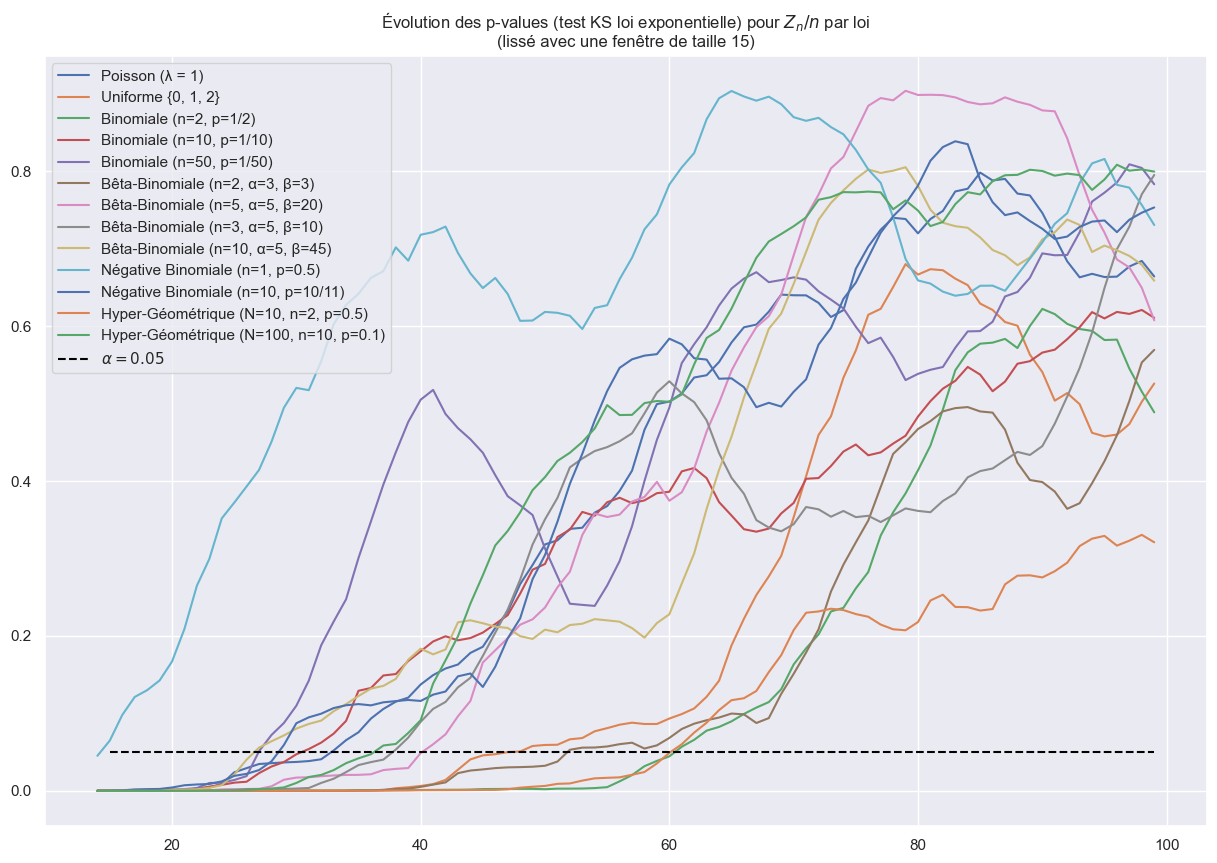

In [269]:
periode_lissage = 15
p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed"
)
plt.legend()
# plt.savefig("assets/img/p-values-evolution-all-laws.png")
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

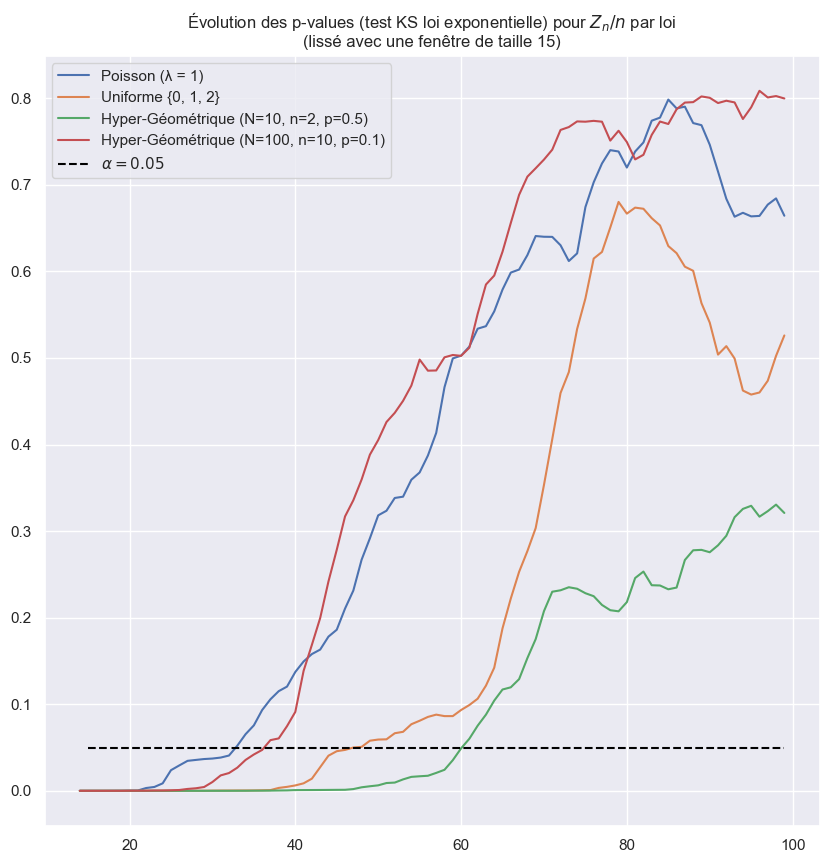

In [254]:
periode_lissage = 15

p_value_df[[
    "Poisson (λ = 1)",
    "Uniforme {0, 1, 2}",
    "Hyper-Géométrique (N=10, n=2, p=0.5)",
    "Hyper-Géométrique (N=100, n=10, p=0.1)",
]].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed"
)
plt.legend()

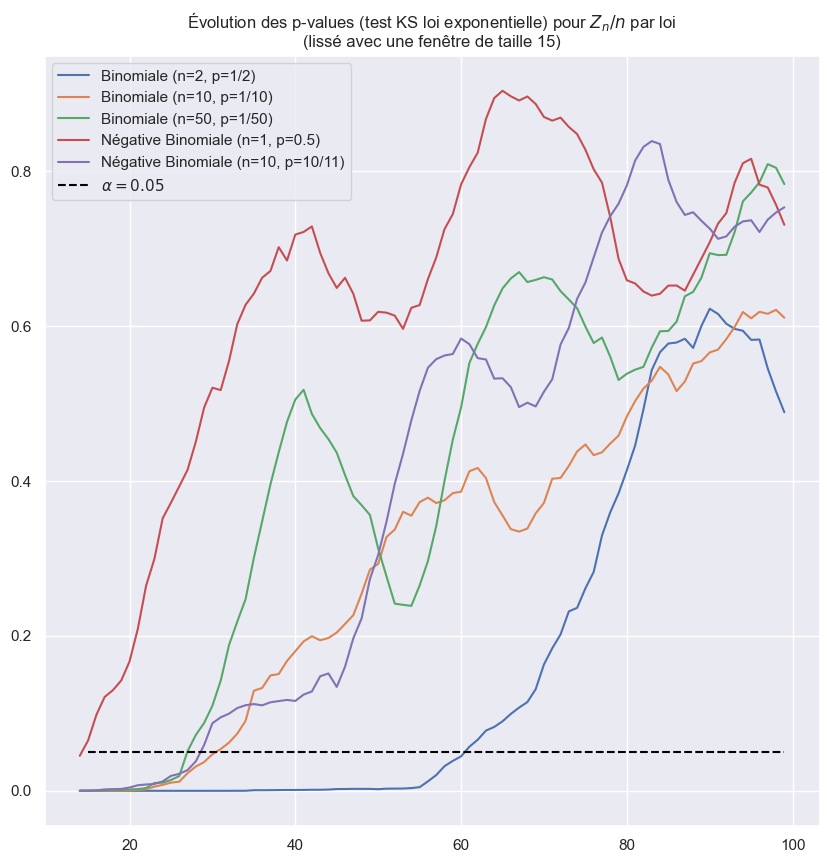

In [256]:
periode_lissage = 15

p_value_df[[
    "Binomiale (n=2, p=1/2)",
    "Binomiale (n=10, p=1/10)",
    "Binomiale (n=50, p=1/50)",
    "Négative Binomiale (n=1, p=0.5)",
    "Négative Binomiale (n=10, p=10/11)",
]].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed"
)
plt.legend()

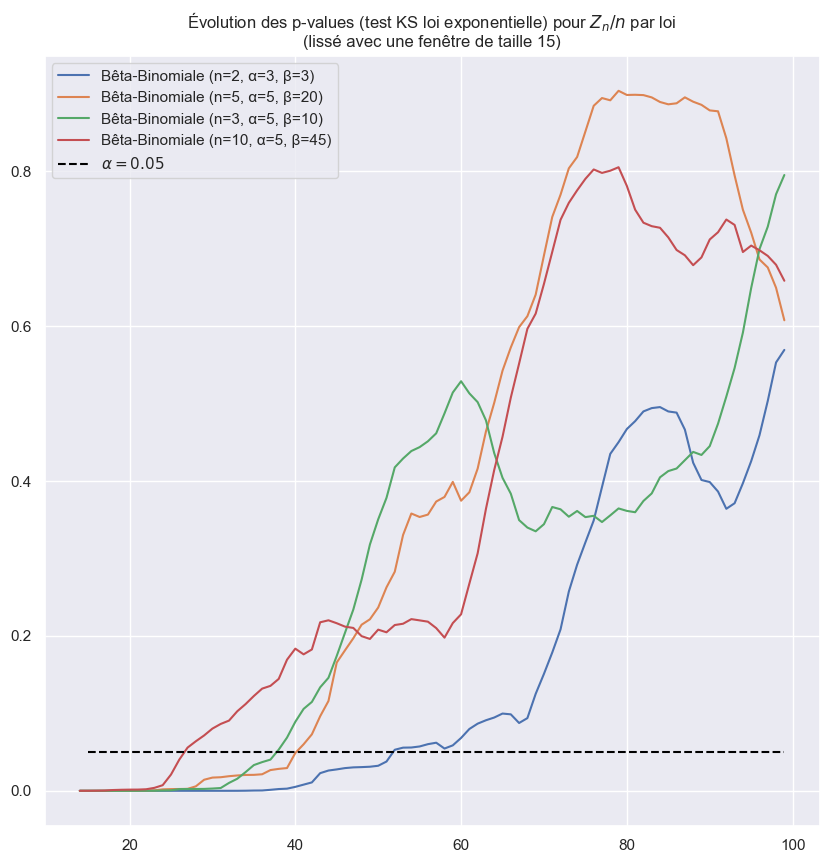

In [257]:
periode_lissage = 15

p_value_df[[
    "Bêta-Binomiale (n=2, α=3, β=3)",
    "Bêta-Binomiale (n=5, α=5, β=20)",
    "Bêta-Binomiale (n=3, α=5, β=10)",
    "Bêta-Binomiale (n=10, α=5, β=45)",
]].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed"
)
plt.legend()

In [ ]:
def plot_p_value(nom_loi: str) -> None:
    """Affiche l'évolution de la p-value"""
    plt.plot(p_value_dict[nom_loi], label="p-value")
    plt.plot(
        list(range(nb_repetitions)),
        [alpha for _ in range(nb_repetitions)],
        label=r"$\alpha = 0.05$",
    )
    plt.legend()

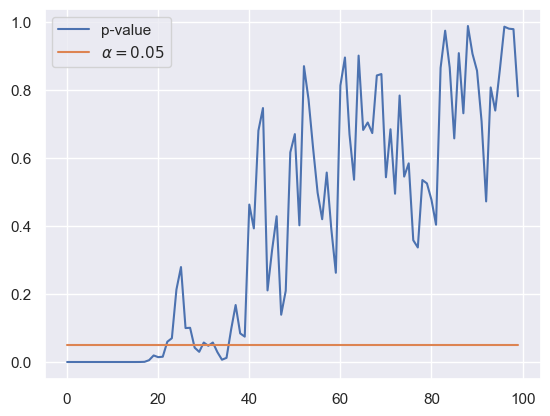

In [200]:
plt.plot(
    simulation_yaglom(
        poisson_1,
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

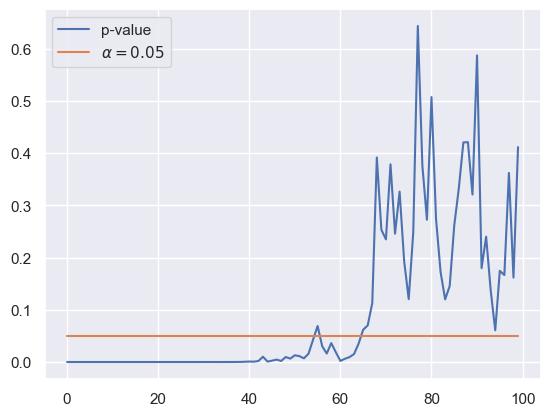

In [201]:
plt.plot(
    simulation_yaglom(
        distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"],
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

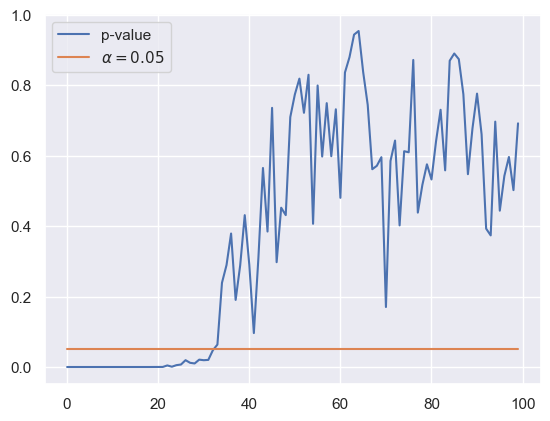

In [202]:
plt.plot(
    simulation_yaglom(
        distributions["Hyper-Géométrique (N=100, n=10, p=0.1)"],
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

self.nb_simulations = 4332


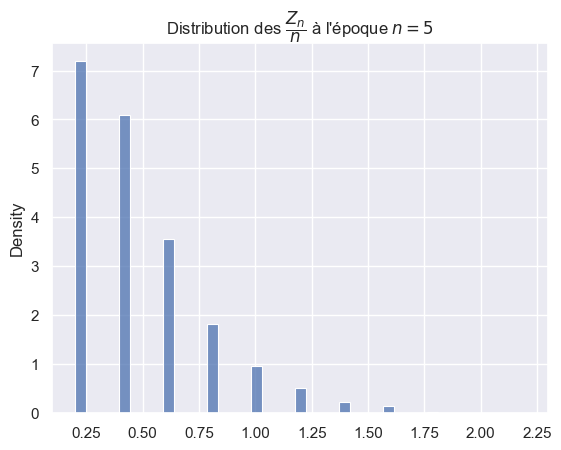

statistique_ks = 0.34800938966339673
p_value = 0.0
p_value = 0.0
self.nb_simulations = 2924


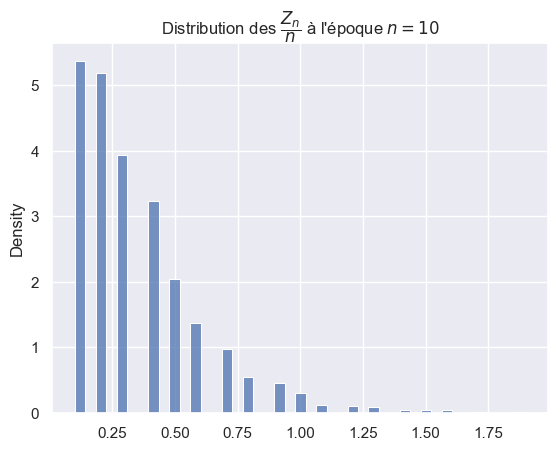

statistique_ks = 0.24871166802222294
p_value = 8.000644720451413e-160
p_value = 8.000644720451413e-160
self.nb_simulations = 2179


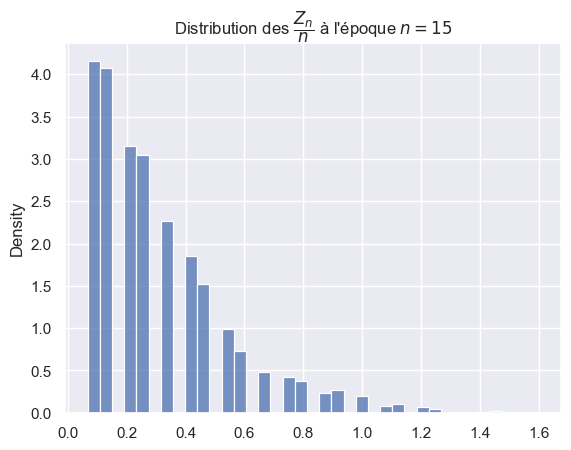

statistique_ks = 0.19422956123228005
p_value = 1.7376693459598994e-72
p_value = 1.7376693459598994e-72
self.nb_simulations = 1735


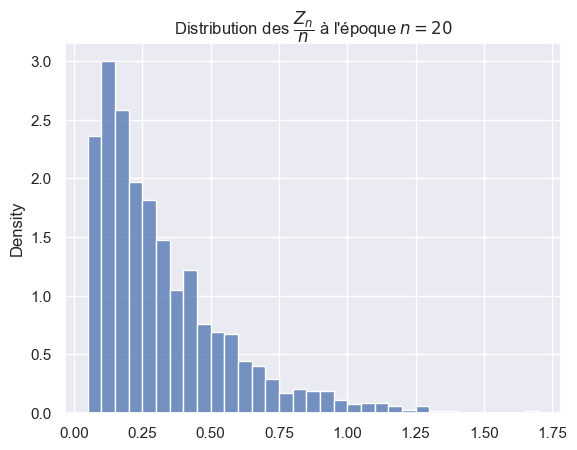

statistique_ks = 0.16958840036598355
p_value = 4.3060290350311006e-44
p_value = 4.3060290350311006e-44
self.nb_simulations = 1431


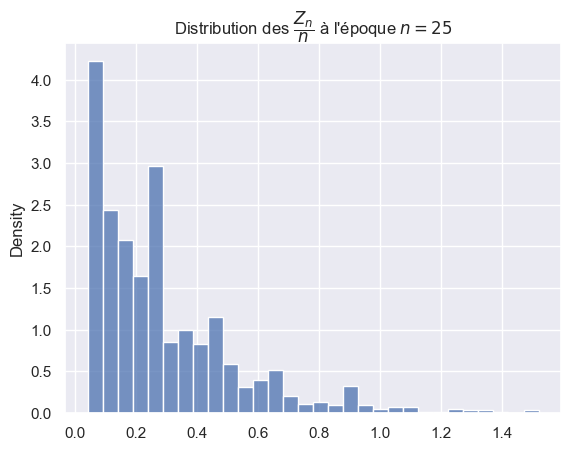

statistique_ks = 0.14731374552101129
p_value = 1.4355640021190942e-27
p_value = 1.4355640021190942e-27
self.nb_simulations = 1224


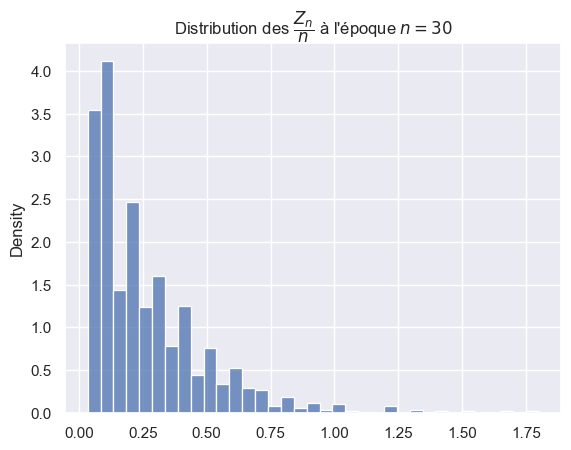

statistique_ks = 0.13336414280675138
p_value = 1.9097839885479138e-19
p_value = 1.9097839885479138e-19
self.nb_simulations = 1087


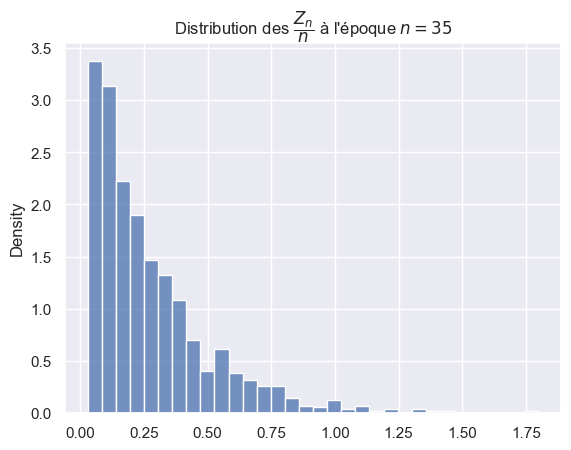

statistique_ks = 0.11224602910615405
p_value = 2.1965322875244356e-12
p_value = 2.1965322875244356e-12
self.nb_simulations = 968


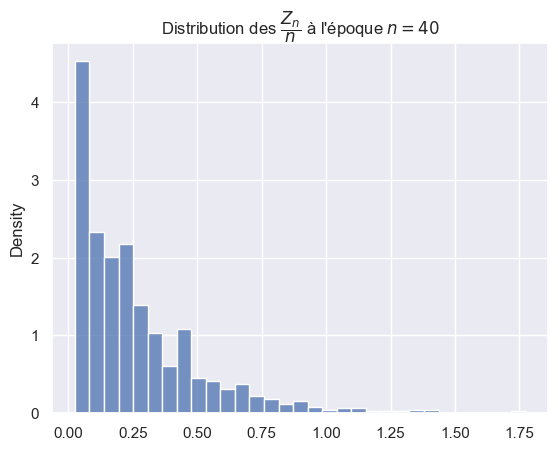

statistique_ks = 0.09311823711214773
p_value = 9.354832462134708e-08
p_value = 9.354832462134708e-08
self.nb_simulations = 871


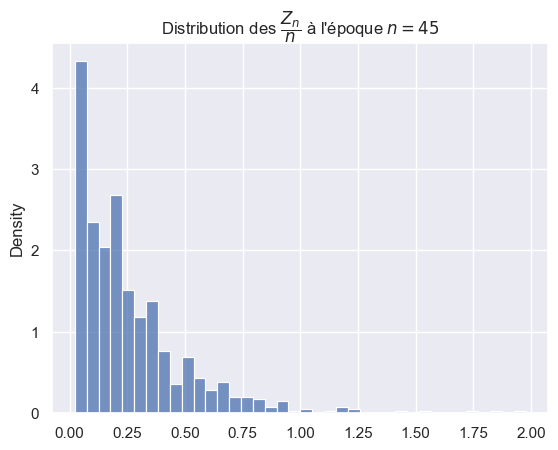

statistique_ks = 0.08228833670611206
p_value = 1.4057666077454234e-05
p_value = 1.4057666077454234e-05
self.nb_simulations = 781


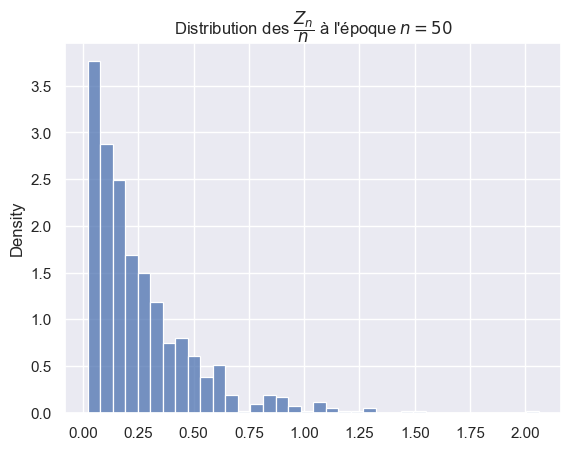

statistique_ks = 0.07439136231086041
p_value = 0.00033247476750641837
p_value = 0.00033247476750641837


In [178]:
sim = SimulateurGaltonWatson(
    distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"], nb_processus=10_000
)
taille_pas = 5
nb_repetitions = 10
taille_echantillon = 50

for i in range(nb_repetitions):
    sim.simule(nb_epoques=taille_pas)
    sim.retire_processus_eteints()

    zn_sur_n = sim.get_zn_sur_n()
    zn_sur_n_sample = zn_sur_n[taille_echantillon:]

    plt.title(
        "Distribution des $\dfrac{Z_n}{n}$ à l'époque $n = "
        + str((i + 1) * taille_pas)
        + "$"
    )
    sns.histplot(zn_sur_n_sample, stat="density")
    plt.show()

    p_value, statistique_ks = test_loi_exponentielle(zn_sur_n)
    print(f"{p_value = }")